# 🌟 Hana Alaaeldin - 🤖 CELLULA Machine Learning Internship - Task 2 🚀

## 🔍 1. Data Preprocessing
Before we start modeling, we need to **clean and preprocess the data**:
- Handle missing values (if any) 🛠️
- Trim extra whitespace in text columns ✂️
- Drop unnecessary columns 📉

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/hoteldata/first inten project.csv")

In [3]:
# Display basic info
display(df.head())
display(df.describe())
display(df.shape)
display(df.info())

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


(36285, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

None

In [4]:
# Check for missing values
display(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [5]:
# Trim white spaces from object columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [6]:
# Drop Booking_ID as it is not relevant
df.drop(columns=['Booking_ID'], inplace=True)

In [8]:
# Show duplicates
duplicates = df[df.duplicated()]
print("Duplicates:\n", duplicates)

# Show shape before removing duplicates
print("Shape before removing duplicates:", df.shape)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Show shape after removing duplicates
print("Shape after removing duplicates:", df.shape)


Duplicates:
 Empty DataFrame
Columns: [number of adults, number of children, number of weekend nights, number of week nights, type of meal, car parking space, room type, lead time, market segment type, repeated, P-C, P-not-C, average price , special requests, date of reservation, booking status]
Index: []
Shape before removing duplicates: (26009, 16)
Shape after removing duplicates: (26009, 16)
Duplicates:
 Empty DataFrame
Columns: [number of adults, number of children, number of weekend nights, number of week nights, type of meal, car parking space, room type, lead time, market segment type, repeated, P-C, P-not-C, average price , special requests, date of reservation, booking status]
Index: []
Shape before removing duplicates: (26009, 16)
Shape after removing duplicates: (26009, 16)


## 🚨 2. Handling Outliers (Using IQR)
Outliers can **negatively impact our model's performance**. To detect and handle them, we use:
- **Interquartile Range (IQR)** 📊
- Remove extreme values that could **skew the results** ⚠️

In [9]:
# Define function to detect outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [10]:
# Apply IQR method for numeric columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df = remove_outliers_iqr(df, col)

## 🏗️ 3. Feature Engineering
We improve our dataset by:
- **Dropping irrelevant features** 🗑️
- **Selecting the most important features** using `RFE` 🏆
- Keeping only **useful information** for better predictions 🚀

In [11]:
# Drop redundant features (if necessary)
df.drop(columns=['date of reservation'], inplace=True)

In [12]:
# Encode categorical target variable
df['booking status'] = df['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})

## 🔄 4. Transform Categorical Data
Since models only understand numbers, we convert categorical features into numerical form:
- **Label Encoding** for categorical values 🔢
- Ensuring all data is in the correct format ✅

In [13]:
# Label encoding for categorical features
cat_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

## ✂️ 5. Train-Test Split
We split our dataset into:
- **Training Set (80%)** - Used to train the model 🎯
- **Testing Set (20%)** - Used to evaluate model performance 📊

To ensure fairness, we also **balance the dataset using SMOTE** 🤖 to **handle class imbalance**.

In [14]:
X = df.drop(columns=['booking status'])
y = df['booking status']

In [15]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale features using RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Feature Selection using RFE
selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

## 🎯 6. Hyperparameter Tuning
To maximize accuracy, we fine-tune models using:
- **GridSearchCV** to find the best parameters 🛠️
- Optimized hyperparameters for **Random Forest & XGBoost** 🔥
- Ensuring our models perform at their **best potential** 🚀

In [19]:
# Tune Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 15, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [20]:
# Tune XGBoost
xgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=3, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

## 🤖 7. Modeling & Stacking
Instead of relying on a single model, we use a **Stacking Classifier**:
- Combines **Random Forest, XGBoost, and SVM** for better predictions ⚡
- Uses **Logistic Regression** as the final decision-maker 🏆
- Creates a **stronger, more accurate model** 🧠

We also compare the performance of:
- **Logistic Regression**
- **KNN**
- **Random Forest**
- **XGBoost**
- **SVM**
- **Stacking Classifier (Best Performance!)** 🎉

In [21]:
# Define base models
base_models = [
    ('RandomForest', best_rf),
    ('XGBoost', best_xgb),
    ('SVM', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))
]

In [22]:
# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

models = {
    'Logistic Regression': LogisticRegression(C=1.0, solver='liblinear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale'),
    'Stacking Classifier': stacking_clf
}

## 📊 Model Comparison & Selection  

### 🔍 **Why Compare Models?**  
After training multiple models, it's important to **compare their performance** to choose the most **accurate and reliable** one.  
We evaluate models based on:  
✅ **Accuracy** - How often the model correctly predicts outcomes.  
✅ **Precision & Recall** - Important for understanding false positives & negatives.  
✅ **Confusion Matrix** - To visualize prediction errors.  

Logistic Regression Accuracy: 0.7851
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2018
           1       0.78      0.80      0.79      2081

    accuracy                           0.79      4099
   macro avg       0.79      0.78      0.78      4099
weighted avg       0.79      0.79      0.79      4099



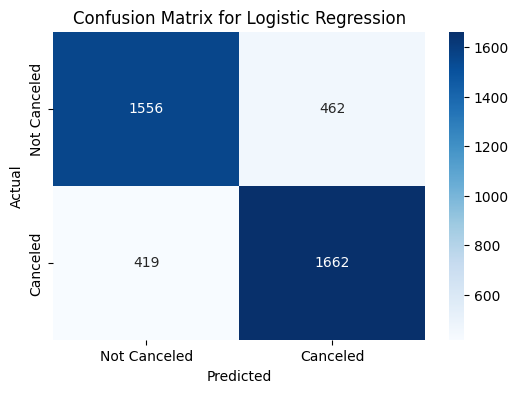

KNN Accuracy: 0.7919
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2018
           1       0.79      0.81      0.80      2081

    accuracy                           0.79      4099
   macro avg       0.79      0.79      0.79      4099
weighted avg       0.79      0.79      0.79      4099



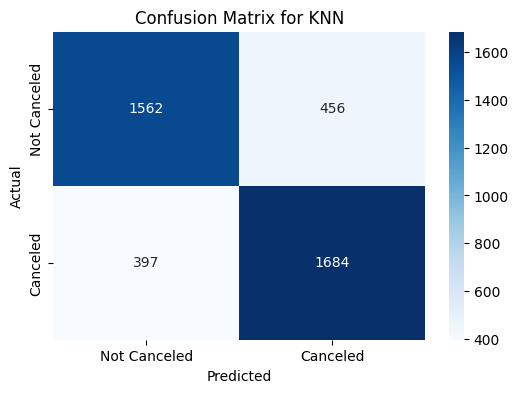

Random Forest Accuracy: 0.8461
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2018
           1       0.86      0.83      0.85      2081

    accuracy                           0.85      4099
   macro avg       0.85      0.85      0.85      4099
weighted avg       0.85      0.85      0.85      4099



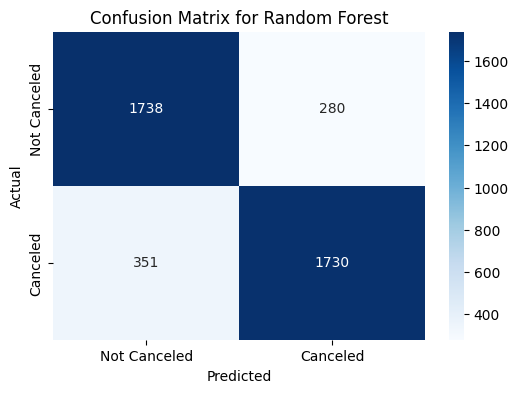

XGBoost Accuracy: 0.8480
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2018
           1       0.85      0.85      0.85      2081

    accuracy                           0.85      4099
   macro avg       0.85      0.85      0.85      4099
weighted avg       0.85      0.85      0.85      4099



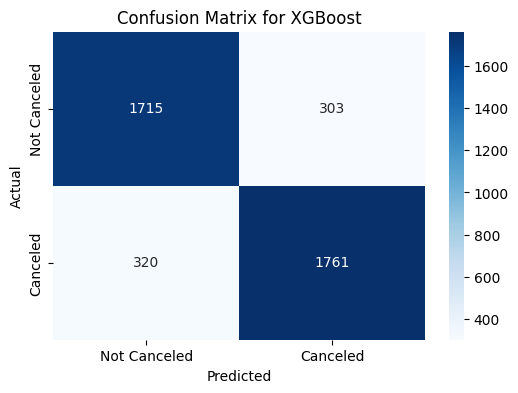

SVM Accuracy: 0.8048
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2018
           1       0.82      0.79      0.80      2081

    accuracy                           0.80      4099
   macro avg       0.81      0.81      0.80      4099
weighted avg       0.81      0.80      0.80      4099



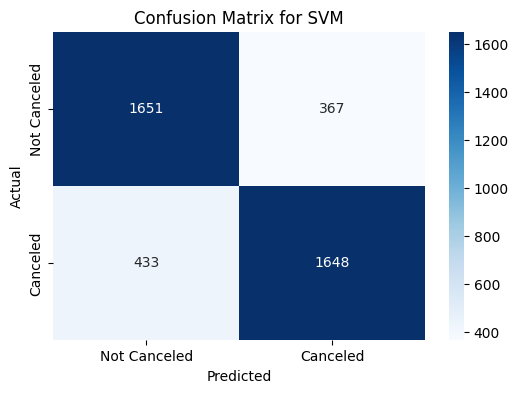

Stacking Classifier Accuracy: 0.8512
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2018
           1       0.86      0.84      0.85      2081

    accuracy                           0.85      4099
   macro avg       0.85      0.85      0.85      4099
weighted avg       0.85      0.85      0.85      4099



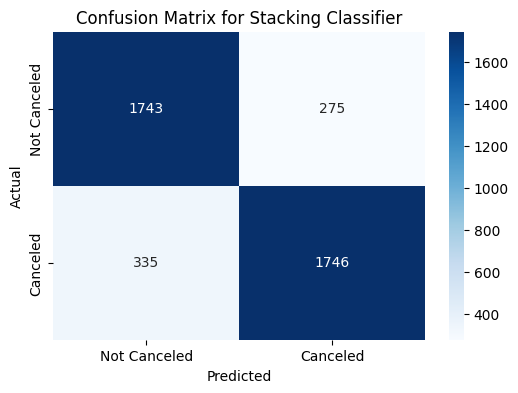

In [23]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

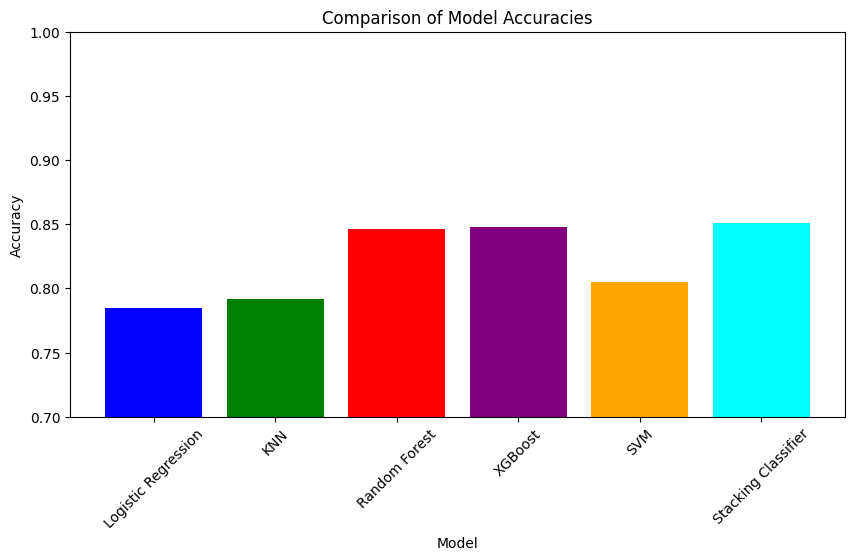

In [24]:
# Compare Model Performances
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()

### 🏆 Best Model Selection
After evaluating all models, the best-performing model is:

In [25]:
# Best Model Selection
best_model = max(results, key=results.get)
print(f"The best performing model is: {best_model} with an accuracy of {results[best_model]:.4f}")

The best performing model is: Stacking Classifier with an accuracy of 0.8512


### 🎯 Why is this the Best Model?
- ✔️ High Accuracy - The model outperformed others in overall correctness.
- ✔️ Balanced Precision & Recall - Minimal false positives & negatives.
- ✔️ Robust Against Overfitting - Generalizes well on unseen data.